<a href="https://colab.research.google.com/github/Siddhi-S-Thakur/Deep-Learning/blob/main/HousePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from keras.layers import Dense,Dropout,Input,BatchNormalization,Activation
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [50]:
df = pd.read_csv('/content/data.csv')

In [51]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [52]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['quarter'] = df['date'].dt.quarter
df['month_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month_cos'] = np.cos(2 * np.pi * df['month'] / 12)

In [53]:
# df.drop(columns= ['data'], inplace = True)
df.drop(columns= ['month'], inplace = True)

In [54]:
df.shape

(4600, 22)

In [55]:
df.info(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [56]:
df.head(1)

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,street,city,statezip,country,year,quarter,month_sin,month_cos
0,2014-05-02,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,...,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,2014,2,0.5,-0.866025


In [57]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'year', 'quarter', 'month_sin', 'month_cos'],
      dtype='object')

<Axes: xlabel='sqft_living_log', ylabel='Count'>

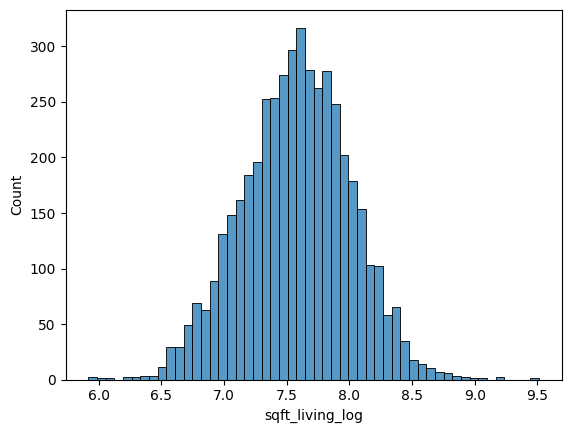

In [58]:
from seaborn import histplot
import numpy as np
df['sqft_living_log'] = np.log1p(df['sqft_living'])
histplot(df, x = 'sqft_living_log')
# df.drop('sqft_living', axis = 1, inplace = True)

In [59]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'year', 'quarter', 'month_sin', 'month_cos',
       'sqft_living_log'],
      dtype='object')

<Axes: xlabel='sqft_lot_log', ylabel='Count'>

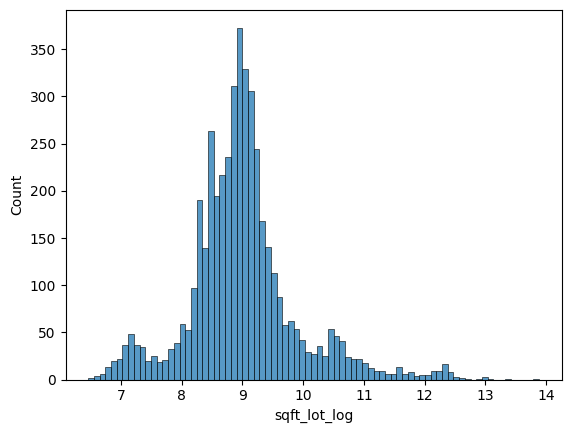

In [60]:
from seaborn import histplot
import numpy as np
df['sqft_lot_log'] = np.log1p(df['sqft_lot'])
histplot(df, x = 'sqft_lot_log')
# df.drop('sqft_lot', axis = 1, inplace = True)

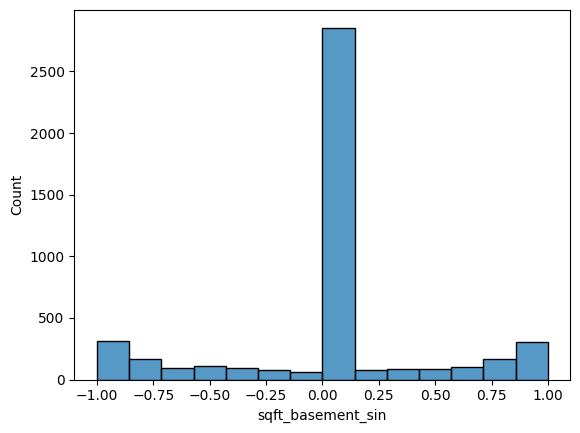

In [61]:
from seaborn import histplot
import numpy as np
df['sqft_basement_sin'] = np.sin(df['sqft_basement'])
histplot(df, x = 'sqft_basement_sin')
df.drop('sqft_basement', axis = 1, inplace = True)

In [62]:
for col in df.select_dtypes(include = object):
  en = LabelEncoder()
  df[col] = en.fit_transform(df[col])

Index([  56,  107,  122,  240,  254,  272,  375,  461,  462,  479,  484,  495,
        679,  747,  779,  798,  878,  879,  999, 1031, 1078, 1103, 1182, 1261,
       1265, 1272, 1275, 1390, 1406, 1408, 1424, 1539, 1722, 1762, 1786, 1944,
       1962, 2152, 2155, 2157, 2199, 2300, 2480, 2551, 2588, 2731, 2855, 2872,
       2889, 2967, 2968, 3056, 3099, 3122, 3260, 3346, 3353, 3402, 3448, 3470,
       3487, 3512, 3525, 3660, 3671, 3700, 3972, 3980, 4061, 4088, 4138, 4234,
       4266, 4283, 4353, 4369, 4374, 4387],
      dtype='int64')

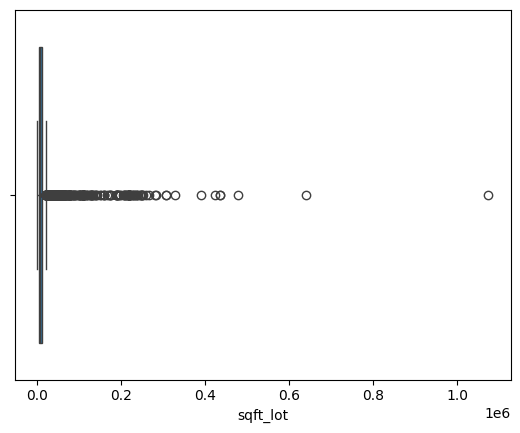

In [63]:
from seaborn import boxplot
boxplot(df,x="sqft_lot")
sc2 = StandardScaler()
df1 = pd.DataFrame(sc2.fit_transform(pd.DataFrame(df["sqft_lot"])))
df1.columns = ["col1"]
df1.describe()
df1[df1["col1"] > 3].index

In [64]:
X = df.drop("price", axis = 1)
y = df['price']